# Team 1 Assignment 4
Pragati Agrawal,
Amogh Bhagwat,
Aarsh Walavalkar, Shivangi Tekriwal, Suyash Jindal, Kshitij Garud


# Long v/s short Trading

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from datetime import date
from datetime import timedelta
import statistics


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
strtDate=dt.datetime(2021,1,1)
endDate=dt.datetime(2023,1,1)

Pair of stationary stocks between 1 Jan 2021 and 1 Jan 2023:

In [ ]:
tickers=yf.Ticker('ASAINPAINT.NS ACC.NS')

In [ ]:
data=yf.download("ASIANPAINT.NS ACC.NS", start=strtDate, end=endDate)

[*********************100%***********************]  2 of 2 completed


In [ ]:
asianpt=yf.Ticker("ASIANPAINT.NS")
asianpaint=asianpt.history(start=strtDate,end=endDate)

In [ ]:
acc=yf.Ticker("ACC.NS")
acc_data=acc.history(start=strtDate,end=endDate)

Removing time parameter from Date indices of stocks dataframes

In [ ]:
asianpaint['Date'] = pd.to_datetime(asianpaint.index)
asianpaint.index= asianpaint['Date'].dt.date

In [ ]:
acc_data['Date'] = pd.to_datetime(acc_data.index)
acc_data.index= acc_data['Date'].dt.date

Renaming the Close field to stock_close

In [ ]:
asianpaint.rename(columns = {'Close':'asianpaint_Close'}, inplace = True)

In [ ]:
acc_data.rename(columns = {'Close':'acc_Close'}, inplace = True)

Concatenating the Close fields of both the stocks into a new dataframe

In [ ]:
final1=pd.concat([asianpaint['asianpaint_Close'],acc_data['acc_Close']],axis=1)

Adding a new field of ratio of the close values to this dataframe

In [ ]:
final1['Close_final']=final1['asianpaint_Close']/final1['acc_Close']
final1.reset_index(inplace=True)
final1.head()

,Date,asianpaint_Close,acc_Close,Close_final
0,2021-01-01,2720.743164,1570.356567,1.732564
1,2021-01-04,2699.324463,1585.132080,1.702902
2,2021-01-05,2738.681885,1588.898438,1.723636
3,2021-01-06,2749.954590,1617.049072,1.700601
4,2021-01-07,2737.113281,1645.924072,1.662964


Finding the ADF parameters:

Test Statistic, Critical Value, p-value

In [ ]:
result = adfuller(final1['Close_final'])
print('ADF Test Statistic: %f' % result[0])
print('5%% Critical Value: %f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Test Statistic: -3.878099
5% Critical Value: -2.867397
p-value: 0.002202


Since the ADF Test Statistic is more negative than the 5% CV, and also the p-value(0.002) is less than 0.05, Asian Paint and ACC are a pair of stationary stocks between 1 Jan 2021 and and 1 Jan 2023.

# Part 2 :Graphs

In [ ]:
final1['mavg']=final1['Close_final'].rolling(window=252).mean()
final1['std_devn']=final1['Close_final'].rolling(window=252).std()
final1['Z-Score']=0
for i in range(len(final1)):
  final1['Z-Score'][i]=(final1['Close_final'][i]-final1['mavg'][i])/final1['std_devn'][i]

<ipython-input-361-1f74b1c82080>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Z-Score'][i]=(final1['Close_final'][i]-final1['mavg'][i])/final1['std_devn'][i]


In [ ]:
final1['ZSc_mean']=0
final1['ZSc_mean+2Std']=2
final1['ZSc_mean-2Std']=-2
final1['ZSc_mean+1.5Std']=1.5
final1['ZSc_mean-1.5Std']=-1.5
final1['ZSc_mean+1Std']=1
final1['ZSc_mean-1Std']=-1

In [ ]:
x_axis=final1['Date']
y_axis=final1['Z-Score']
z=final1['ZSc_mean']
b=final1['ZSc_mean+2Std']
c=final1['ZSc_mean-2Std']
d=final1['ZSc_mean+1.5Std']
e=final1['ZSc_mean-1.5Std']
f=final1['ZSc_mean+1Std']
g=final1['ZSc_mean-1Std']

Text(0, 0.5, 'Z-Scores')

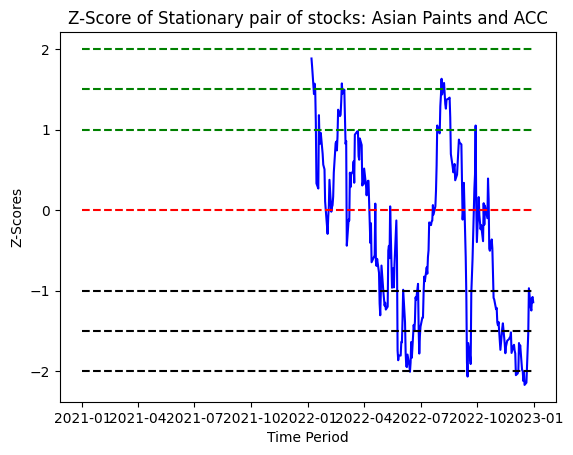

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.plot(x_axis,d,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis,e,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.plot(x_axis,f,color='g',linestyle='dashed',label='mean+1*std=1')
plt.plot(x_axis,g,color='k',linestyle='dashed',label='mean-1*std=-1')
plt.title("Z-Score of Stationary pair of stocks: Asian Paints and ACC")
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

# Task 3:Returns

Buy and Sell signals at 1.5 standard deviation

In [ ]:
asian_new=yf.download("ASIANPAINT.NS", start=strtDate, end=endDate)
acc_new=yf.download("ACC.NS", start=strtDate, end=endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
asian_both=yf.download("ASIANPAINT.NS", start=strtDate, end=endDate)
acc_both=yf.download("ACC.NS", start=strtDate, end=endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
asian_new.rename(columns = {'Close':'asianpaint_newClose'}, inplace = True)
acc_new.rename(columns = {'Close':'acc_newClose'}, inplace = True)
final_new=pd.concat([asian_new['asianpaint_newClose'],acc_new['acc_newClose']],axis=1)

In [ ]:
asian_both.rename(columns = {'Close':'asianpaint_Close'}, inplace = True)
acc_both.rename(columns = {'Close':'acc_Close'}, inplace = True)
final=pd.concat([asian_both['asianpaint_Close'],acc_both['acc_Close']],axis=1)

In [ ]:
final_new['Close_final_new']=final_new['asianpaint_newClose']/final_new['acc_newClose']
final_new.reset_index(inplace=True)
final_new.head()

,Date,asianpaint_newClose,acc_newClose,Close_final_new
0,2021-01-01,2775.550049,1626.099976,1.706875
1,2021-01-04,2753.699951,1641.400024,1.677653
2,2021-01-05,2793.850098,1645.300049,1.698079
3,2021-01-06,2805.350098,1674.449951,1.675386
4,2021-01-07,2792.250000,1704.349976,1.638308


In [ ]:
final['Close_final']=final['asianpaint_Close']/final['acc_Close']
final.reset_index(inplace=True)
final.head()

,Date,asianpaint_Close,acc_Close,Close_final
0,2021-01-01,2775.550049,1626.099976,1.706875
1,2021-01-04,2753.699951,1641.400024,1.677653
2,2021-01-05,2793.850098,1645.300049,1.698079
3,2021-01-06,2805.350098,1674.449951,1.675386
4,2021-01-07,2792.250000,1704.349976,1.638308


In [ ]:
final['mavg']=final['Close_final'].rolling(window=252).mean()
final['std_devn']=final['Close_final'].rolling(window=252).std()
final['Z-Score']=(final['Close_final']-final['mavg'])/final['std_devn']

In [ ]:
final['ZSc_mean']=0
final['ZSc_mean+2Std']=2
final['ZSc_mean-2Std']=-2
final['ZSc_mean+1.5Std']=1.5
final['ZSc_mean-1.5Std']=-1.5
final['ZSc_mean+1Std']=1
final['ZSc_mean-1Std']=-1

In [ ]:
import matplotlib.dates as mdates
final['Date_new'] = final['Date'].apply(mdates.date2num)

In [ ]:
x_axis1=final['Date']
y_axis1=final['Z-Score']
z1=final['ZSc_mean']
b1=final['ZSc_mean+2Std']
c1=final['ZSc_mean-2Std']
d1=final['ZSc_mean+1.5Std']
e1=final['ZSc_mean-1.5Std']
f1=final['ZSc_mean+1Std']
g1=final['ZSc_mean-1Std']

# Sell and buy Signals at 1.5 Std deviation

In [ ]:
sell_signals = []  # sell asian stocks and buy acc
buy_signals = []  # sell acc and buy asian
signals = []

status = ''
for i in range(len(final)-1) :
    if ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] > final['ZSc_mean+1.5Std'][i]) or (final["Z-Score"][i]<final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] < final['ZSc_mean-1.5Std'][i]) or (final["Z-Score"][i]>final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)


[251, 393]
[345, 421]


Text(0, 0.5, 'Z-Scores')

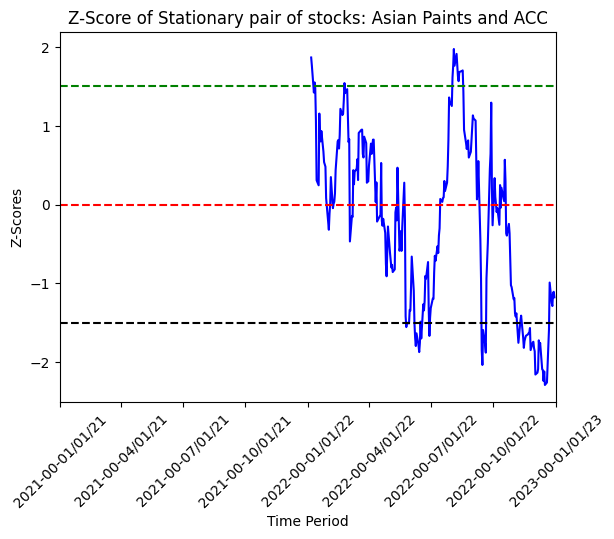

In [ ]:
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-01-01')
ax.set_xlim(start_date, end_date)


plt.plot(x_axis1,y_axis1,color='b',label='Z-Score')
plt.plot(x_axis1,z1,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis1,d1,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis1,e1,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.title("Z-Score of Stationary pair of stocks: Asian Paints and ACC")
plt.scatter(sell_signals, final['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final['Z-Score'][buy_signals], marker='^', color='g')
plt.xticks(rotation=45)
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 498.6693115234375
current value = 4841692.993652344
returns = -3.1561667407226546%
sells = 2, buys = 2


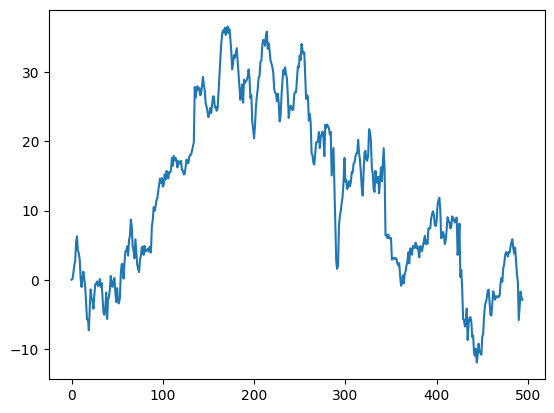

In [ ]:
capital = 50_00_000

n_acc = (capital // 2) // acc_new['acc_newClose'][0]
n_asian = (capital // 2) // asian_new['asianpaint_newClose'][0]

capital -= n_acc * acc_new['acc_newClose'][0]
capital -= n_asian * asian_new['asianpaint_newClose'][0]
index = []
returns = []

sell = 0
buy = 0

for i in range(len(signals)):

    if (signals[i][1] == 'SELL'):  # sell acc and buy asian
        sell += 1
        capital += n_acc * acc_both['acc_Close'][signals[i][0]]
        n_acc = 0
        n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]]
        capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]]) * asian_both['asianpaint_Close'][signals[i][0]]
        for x in range(signals[i+1][0]-signals[i][0]):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]+x]-asian_both['asianpaint_Close'][signals[i][0]])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]]-acc_both['acc_Close'][signals[i][0]+x])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)

    elif (signals[i][1] == 'BUY'):
        buy += 1
        capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]]
        n_asian = 0
        n_acc += capital // acc_both['acc_Close'][signals[i][0]]
        capital -= (capital // acc_both['acc_Close'][signals[i][0]]) * acc_both['acc_Close'][signals[i][0]]
        for x in range(signals[i+1][0]-signals[i][0]):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]]-asian_both['asianpaint_Close'][signals[i][0]+x])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]+x]-acc_both['acc_Close'][signals[i][0]])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_acc * acc_both['acc_Close'][signals[i][0]+x]
            n_acc=0
            n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
    elif i in index:
      continue
    else:
     current_value = n_acc * acc_both['acc_Close'][signals[i][0]] + n_asian * asian_both['asianpaint_Close'][signals[i][0]]+capital
     returns.append((current_value / 50_00_000 - 1) * 100)
     index.append(signals[i][0])



current_value = n_acc * acc_both['acc_Close'][-1] + n_asian * asian_both['asianpaint_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
print(f"sells = {sell}, buys = {buy}")

plt.plot(index, returns)

# Sell and Buy at 1 standard deviation

In [ ]:
sell_signals = []  # sell asian stocks and buy acc
buy_signals = []  # sell acc and buy asian
signals = []

status = ''
for i in range(len(final)-1) :
    if ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] > final['ZSc_mean+1Std'][i]) or (final["Z-Score"][i]<final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] < final['ZSc_mean-1Std'][i]) or (final["Z-Score"][i]>final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)

[251, 390, 431]
[344, 421, 450]


Text(0, 0.5, 'Z-Scores')

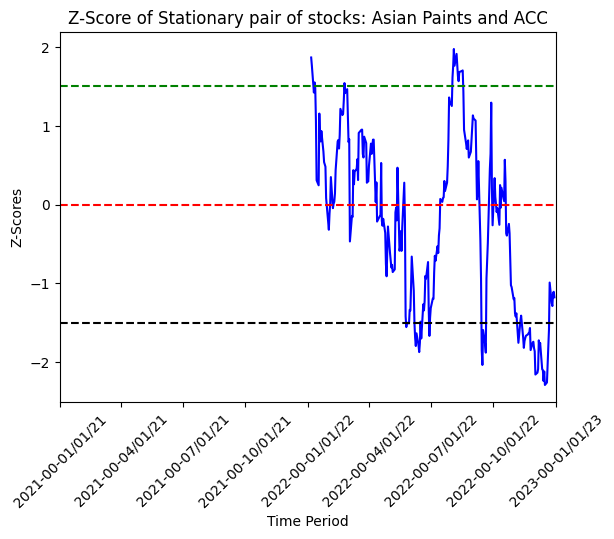

In [ ]:
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-01-01')
ax.set_xlim(start_date, end_date)


plt.plot(x_axis1,y_axis1,color='b',label='Z-Score')
plt.plot(x_axis1,z1,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis1,d1,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis1,e1,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.title("Z-Score of Stationary pair of stocks: Asian Paints and ACC")
plt.scatter(sell_signals, final['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final['Z-Score'][buy_signals], marker='^', color='g')
plt.xticks(rotation=45)
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 1753.3265380859375
current value = 5481022.326660156
returns = 9.655513063964838%
sells = 3, buys = 3


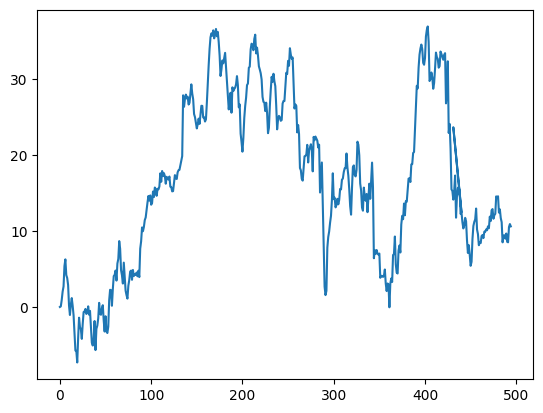

In [ ]:
capital = 50_00_000

n_acc = (capital // 2) // acc_new['acc_newClose'][0]
n_asian = (capital // 2) // asian_new['asianpaint_newClose'][0]

capital -= n_acc * acc_new['acc_newClose'][0]
capital -= n_asian * asian_new['asianpaint_newClose'][0]
index = []
returns = []

sell = 0
buy = 0

for i in range(len(signals)):

    if (signals[i][1] == 'SELL'):  # sell acc and buy asian
        sell += 1
        capital += n_acc * acc_both['acc_Close'][signals[i][0]]
        n_acc = 0
        n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]]
        capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]]) * asian_both['asianpaint_Close'][signals[i][0]]
        for x in range(signals[i+1][0]-signals[i][0]):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]+x]-asian_both['asianpaint_Close'][signals[i][0]])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]]-acc_both['acc_Close'][signals[i][0]+x])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)

    elif (signals[i][1] == 'BUY'):
        buy += 1
        capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]]
        n_asian = 0
        n_acc += capital // acc_both['acc_Close'][signals[i][0]]
        capital -= (capital // acc_both['acc_Close'][signals[i][0]]) * acc_both['acc_Close'][signals[i][0]]
        for x in range(len(final)):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]]-asian_both['asianpaint_Close'][signals[i][0]+x])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]+x]-acc_both['acc_Close'][signals[i][0]])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_acc * acc_both['acc_Close'][signals[i][0]+x]
            n_acc=0
            n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
    elif i in index:
      continue
    else:
     current_value = n_acc * acc_both['acc_Close'][signals[i][0]] + n_asian * asian_both['asianpaint_Close'][signals[i][0]]+capital
     returns.append((current_value / 50_00_000 - 1) * 100)
     index.append(signals[i][0])



current_value = n_acc * acc_both['acc_Close'][-1] + n_asian * asian_both['asianpaint_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
print(f"sells = {sell}, buys = {buy}")

plt.plot(index, returns)

# Sell and Buy at 2 standard deviation

In [ ]:
sell_signals = []  # sell asian stocks and buy acc
buy_signals = []  # sell acc and buy asian
signals = []

status = ''
for i in range(len(final)-1) :
    if ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] > final['ZSc_mean+2Std'][i]) or (final["Z-Score"][i]<final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i,'SELL'))
        status = 'SELL'
    elif ((final["Z-Score"][i] !="NaN" and final["Z-Score"][i] < final['ZSc_mean-2Std'][i]) or (final["Z-Score"][i]>final["Z-Score"][i+1] and final["Z-Score"][i]==0)) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i,'BUY'))
        status = 'BUY'
    else:
        signals.append((i, 'NONE'))

print(sell_signals)
print(buy_signals)

[]
[422]


Text(0, 0.5, 'Z-Scores')

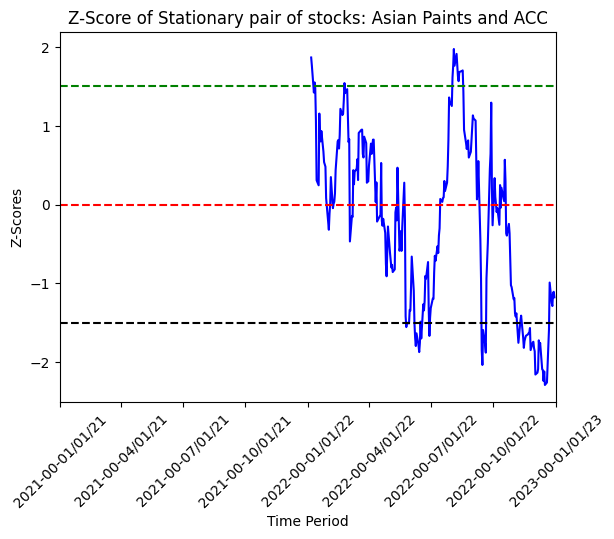

In [ ]:
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-01-01')
ax.set_xlim(start_date, end_date)


plt.plot(x_axis1,y_axis1,color='b',label='Z-Score')
plt.plot(x_axis1,z1,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis1,d1,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis1,e1,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.title("Z-Score of Stationary pair of stocks: Asian Paints and ACC")
plt.scatter(sell_signals, final['Z-Score'][sell_signals], marker='v', color='r')
plt.scatter(buy_signals, final['Z-Score'][buy_signals], marker='^', color='g')
plt.xticks(rotation=45)
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

remaining capital = 1244.9012451171875
current value = 5746581.718261719
returns = 14.956532390136722%
sells = 0, buys = 1


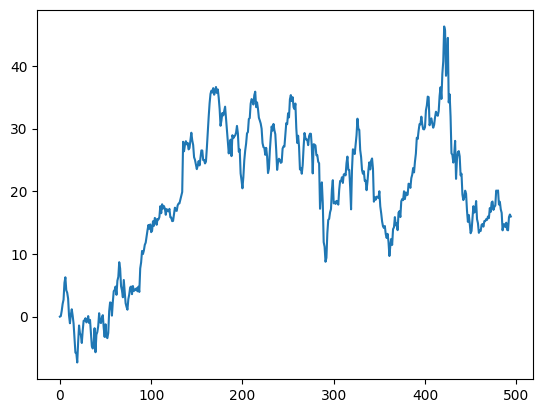

In [ ]:
capital = 50_00_000

n_acc = (capital // 2) // acc_new['acc_newClose'][0]
n_asian = (capital // 2) // asian_new['asianpaint_newClose'][0]

capital -= n_acc * acc_new['acc_newClose'][0]
capital -= n_asian * asian_new['asianpaint_newClose'][0]
index = []
returns = []

sell = 0
buy = 0

for i in range(len(signals)):

    if (signals[i][1] == 'SELL'):  # sell acc and buy asian
        sell += 1
        capital += n_acc * acc_both['acc_Close'][signals[i][0]]
        n_acc = 0
        n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]]
        capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]]) * asian_both['asianpaint_Close'][signals[i][0]]
        for x in range(signals[i+1][0]-signals[i][0]):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]+x]-asian_both['asianpaint_Close'][signals[i][0]])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]]-acc_both['acc_Close'][signals[i][0]+x])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)

    elif (signals[i][1] == 'BUY'):
        buy += 1
        capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]]
        n_asian = 0
        n_acc += capital // acc_both['acc_Close'][signals[i][0]]
        capital -= (capital // acc_both['acc_Close'][signals[i][0]]) * acc_both['acc_Close'][signals[i][0]]
        for x in range(len(final)):
          if(x in buy_signals or x in sell_signals):
            break
          else:
           if((asian_both['asianpaint_Close'][signals[i][0]]-asian_both['asianpaint_Close'][signals[i][0]+x])>0.05*asian_both['asianpaint_Close'][signals[i][0]]) or ((acc_both['acc_Close'][signals[i][0]+x]-acc_both['acc_Close'][signals[i][0]])>0.05*acc_both['acc_Close'][signals[i][0]]):
            capital += n_acc * acc_both['acc_Close'][signals[i][0]+x]
            n_acc=0
            n_asian += capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           elif (final['Z-Score'][signals[i][0]+x]==0):
            capital += n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]
            n_asian=0
            n_acc +=  capital // asian_both['asianpaint_Close'][signals[i][0]+x]
            capital -= (capital // asian_both['asianpaint_Close'][signals[i][0]+x]) * asian_both['asianpaint_Close'][signals[i][0]+x]
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x] + capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
            break
           else:
            current_value = n_acc * acc_both['acc_Close'][signals[i][0]+x] + n_asian * asian_both['asianpaint_Close'][signals[i][0]+x]+capital
            returns.append((current_value / 50_00_000 - 1) * 100)
            index.append(signals[i][0]+x)
    elif i in index:
      continue
    else:
     current_value = n_acc * acc_both['acc_Close'][signals[i][0]] + n_asian * asian_both['asianpaint_Close'][signals[i][0]]+capital
     returns.append((current_value / 50_00_000 - 1) * 100)
     index.append(signals[i][0])



current_value = n_acc * acc_both['acc_Close'][-1] + n_asian * asian_both['asianpaint_Close'][-1]
print(f"remaining capital = {capital}")
print(f"current value = {current_value}")
print(f"returns = {((current_value + capital) / 50_00_000 - 1) * 100}%")
print(f"sells = {sell}, buys = {buy}")

plt.plot(index, returns)